In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


/Users/andycai/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Initialize Reward

In [83]:
grid_size = 10
rewards = []
# initialize Reward function
for i in range(grid_size): 
        curr_row = [(float(grid_size-i)) for j in range(grid_size)]
        rewards.append(curr_row)
rewards = np.array(rewards)
gamma = 1 # discounting rate
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # down, up, right, left 
num_iterations = 1000

## Utilities

In [84]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminal_states:
        return initialPosition, 0

    curr_reward = rewards[initialPosition[0], initialPosition[1]]
    
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or grid_size in finalPosition: # if the final position is out of bounds
        finalPosition = initialPosition
        
    return finalPosition, curr_reward

In [85]:
value_map = np.zeros((grid_size, grid_size))
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

## Policy Evaluation

In [86]:
deltas = []
# this is a O(1000*m*n^2) algorithm, 
for it in range(num_iterations):
    copyValueMap = np.copy(value_map)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*value_map[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    value_map = copyValueMap
#     if it in [0,1,2,9, 99, num_iterations-1]:
#         print("Iteration {}".format(it+1))
#         print(value_map)
#         print("")

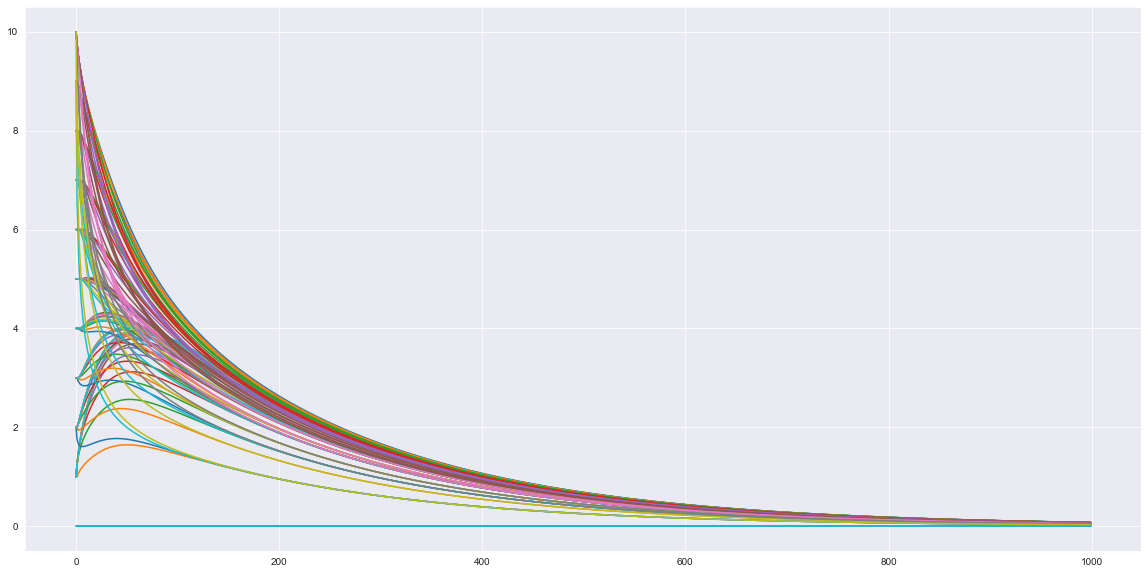

In [87]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

## Finding Optimal Policy

In [90]:
def is_valid_coordinate(coord):
    i, j = coord[0], coord[1]
    return i >= 0 and i < grid_size and j >= 0 and j < grid_size

In [89]:
print(value_map)

[[   0.          478.22248576  752.49472081  926.02093248 1041.06508194
  1118.14856274 1168.96695995 1201.07300444 1219.64276028 1228.06974292]
 [ 496.22248576  678.27955834  849.41085563  980.71472038 1075.26624564
  1140.67428995 1183.95386663 1210.89305369 1226.07485154 1232.78864632]
 [ 802.49472081  881.41085563  978.34317639 1064.38164302 1130.85571768
  1177.59071895 1207.55552497 1224.75284199 1233.26205975 1236.51066257]
 [1018.02093248 1054.71472038 1106.38164302 1155.84689497 1194.43568263
  1219.54177075 1232.19809017 1235.57985773 1233.99223274 1231.76504222]
 [1181.06508194 1197.26624564 1220.85571767 1242.43568263 1255.75634978
  1258.20851474 1250.38608546 1235.64968385 1219.6363333  1209.06678534]
 [1308.14856274 1312.67428995 1317.59071895 1317.54177075 1308.20851474
  1287.41549675 1255.75397656 1217.26088647 1180.09886541 1156.05962411]
 [1406.96695994 1403.95386663 1395.55552497 1378.19809017 1348.38608545
  1303.75397656 1244.21144023 1173.79243961 1103.68344514 

In [100]:
action_map = []
dirs = ["down", "up", "right", "left"]
for i in range(grid_size):
    curr_action = []
    for j in range(grid_size):
        direction = 0 # 0 : down, 1 : up, 2 : right, 3: left
        max_val = float("-inf")
        for k in range(len(actions)):
            action = actions[k]
            coord = np.array([i, j]) + np.array(action)
            print(coord)
            if (is_valid_coordinate(coord)):
                curr_val = value_map[coord[0], coord[1]]
                if (curr_val > max_val):
                    direction = k 
                    max_val = curr_val
#                 elif (curr_val == max_val):
#                     direction += k
#         curr_action.append(dirs[direction])
        curr_action.append(direction)
    action_map.append(curr_action)
    
action_map = np.array(action_map)
print(action_map)    

[-1  0]
[1 0]
[0 1]
[ 0 -1]
[-1  1]
[1 1]
[0 2]
[0 0]
[-1  2]
[1 2]
[0 3]
[0 1]
[-1  3]
[1 3]
[0 4]
[0 2]
[-1  4]
[1 4]
[0 5]
[0 3]
[-1  5]
[1 5]
[0 6]
[0 4]
[-1  6]
[1 6]
[0 7]
[0 5]
[-1  7]
[1 7]
[0 8]
[0 6]
[-1  8]
[1 8]
[0 9]
[0 7]
[-1  9]
[1 9]
[ 0 10]
[0 8]
[0 0]
[2 0]
[1 1]
[ 1 -1]
[0 1]
[2 1]
[1 2]
[1 0]
[0 2]
[2 2]
[1 3]
[1 1]
[0 3]
[2 3]
[1 4]
[1 2]
[0 4]
[2 4]
[1 5]
[1 3]
[0 5]
[2 5]
[1 6]
[1 4]
[0 6]
[2 6]
[1 7]
[1 5]
[0 7]
[2 7]
[1 8]
[1 6]
[0 8]
[2 8]
[1 9]
[1 7]
[0 9]
[2 9]
[ 1 10]
[1 8]
[1 0]
[3 0]
[2 1]
[ 2 -1]
[1 1]
[3 1]
[2 2]
[2 0]
[1 2]
[3 2]
[2 3]
[2 1]
[1 3]
[3 3]
[2 4]
[2 2]
[1 4]
[3 4]
[2 5]
[2 3]
[1 5]
[3 5]
[2 6]
[2 4]
[1 6]
[3 6]
[2 7]
[2 5]
[1 7]
[3 7]
[2 8]
[2 6]
[1 8]
[3 8]
[2 9]
[2 7]
[1 9]
[3 9]
[ 2 10]
[2 8]
[2 0]
[4 0]
[3 1]
[ 3 -1]
[2 1]
[4 1]
[3 2]
[3 0]
[2 2]
[4 2]
[3 3]
[3 1]
[2 3]
[4 3]
[3 4]
[3 2]
[2 4]
[4 4]
[3 5]
[3 3]
[2 5]
[4 5]
[3 6]
[3 4]
[2 6]
[4 6]
[3 7]
[3 5]
[2 7]
[4 7]
[3 8]
[3 6]
[2 8]
[4 8]
[3 9]
[3 7]
[2 9]
[4 9]
[ 3 10]
[3 8]
[3 0